###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading the Data



In [3]:
df_data = pd.read_csv('NLSY97_subset.csv')

## Data Exploration 



In [5]:
df_data.shape

(2000, 96)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

## Data Cleaning 



In [11]:
df_data.isna().values.any()

True

In [61]:
df_data.isna().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

In [4]:
for label, column in df_data.items():
    if column.isna().values.any():
        df_data[label] = column.fillna(column.median())

In [72]:
df_data.isna().values.any()

False

In [73]:
df_data.duplicated().values.sum()

0

## Descriptive Statistics

In [75]:
df_data.describe()

ID  EARNINGS        S      EXP   FEMALE     MALE    BYEAR  \
count 1,487.00  1,487.00 1,487.00 1,487.00 1,487.00 1,487.00 1,487.00   
mean  3,547.13     18.81    14.56     6.70     0.49     0.51 1,982.07   
std   2,009.84     12.00     2.77     2.86     0.50     0.50     1.38   
min       1.00      2.00     6.00     0.00     0.00     0.00 1,980.00   
25%   1,888.00     11.41    12.00     4.65     0.00     0.00 1,981.00   
50%   3,474.00     15.75    15.00     6.63     0.00     1.00 1,982.00   
75%   5,160.50     22.60    16.00     8.71     1.00     1.00 1,983.00   
max   8,980.00    132.89    20.00    14.73     1.00     1.00 1,984.00   

           AGE  AGEMBTH    HHINC97  ...    URBAN    REGNE    REGNC     REGW  \
count 1,487.00 1,487.00   1,487.00  ... 1,487.00 1,487.00 1,487.00 1,487.00   
mean     28.93    26.32  56,829.43  ...     0.78     0.16     0.27     0.34   
std       1.38     5.02  39,605.44  ...     0.43     0.36     0.44     0.47   
min      27.00    12.00       0.00  ...     0.00     0.00     0.00     0.00   
25%      28.00    23.00  36,000.00  ...     1.00     0.00     0.00     0.00   
50%      29.00    26.00  50,500.00  ...     1.00     0.00     0.00     0.00   
75%      30.00    30.00  66,400.00  ...     1.00     0.00     1.00     1.00   
max      31.00    45.00 246,474.00  ...     2.00     1.00     1.00     1.00   

          REGS  MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  
count 1,487.00 1,487.00  1,487.00 1,487.00 1,487.00  1,487.00  
mean      0.23     0.05      0.54     0.41     0.00      0.00  
std       0.42     0.21      0.50     0.49     0.04      0.00  
min       0.00     0.00      0.00     0.00     0.00      0.00  
25%       0.00     0.00      0.00     0.00     0.00      0.00  
50%       0.00     0.00      1.00     0.00     0.00      0.00  
75%       0.00     0.00      1.00     1.00     0.00      0.00  
max       1.00     1.00      1.00     1.00     1.00      0.00  

[8 rows x 96 columns]

In [24]:
df_data.head()

ID  EARNINGS   S  EXP  FEMALE  MALE  BYEAR  AGE  AGEMBTH   HHINC97  ...  \
0  4275     18.50  12 9.71       0     1   1984   27    24.00 64,000.00  ...   
1  4328     19.23  17 5.71       0     1   1982   29    32.00  6,000.00  ...   
2  8763     39.05  14 9.94       0     1   1981   30    23.00 88,252.00  ...   
3  8879     16.80  18 1.54       0     1   1983   28    30.00       NaN  ...   
4  1994     36.06  15 2.94       0     1   1984   27    23.00 44,188.00  ...   

   URBAN  REGNE  REGNC  REGW  REGS  MSA11NO  MSA11NCC  MSA11CC  MSA11NK  \
0      1      0      0     1     0        0         0        1        0   
1      2      0      0     1     0        0         1        0        0   
2      1      0      0     0     1        0         0        1        0   
3      1      0      1     0     0        0         1        0        0   
4      1      0      0     0     1        0         0        1        0   

   MSA11NIC  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 96 columns]

In [30]:
reduced_df = df_data[['EARNINGS','EXP','MALE','AGE','S','SIBLINGS','AGEMBTH','HHINC97','POVRAT97','PRMONM','PRMONF','HOURS','TENURE','JOBS']]
reduced_df.head()

EARNINGS  EXP  MALE  AGE   S  SIBLINGS  AGEMBTH   HHINC97  POVRAT97  \
0     18.50 9.71     1   27  12         1    24.00 64,000.00    402.00   
1     19.23 5.71     1   29  17         3    32.00  6,000.00     38.00   
2     39.05 9.94     1   30  14         1    23.00 88,252.00    555.00   
3     16.80 1.54     1   28  18         2    30.00 50,502.00    304.00   
4     36.06 2.94     1   27  15         1    23.00 44,188.00    278.00   

   PRMONM  PRMONF  HOURS  TENURE  JOBS  
0   14.00   14.00     50    4.77  6.00  
1   12.00   12.00     50    9.06  5.00  
2   10.00    8.00     65    4.98  3.00  
3    6.00    4.00     40    1.02 10.00  
4   11.00    8.00     40    2.35  7.00

## Visualization

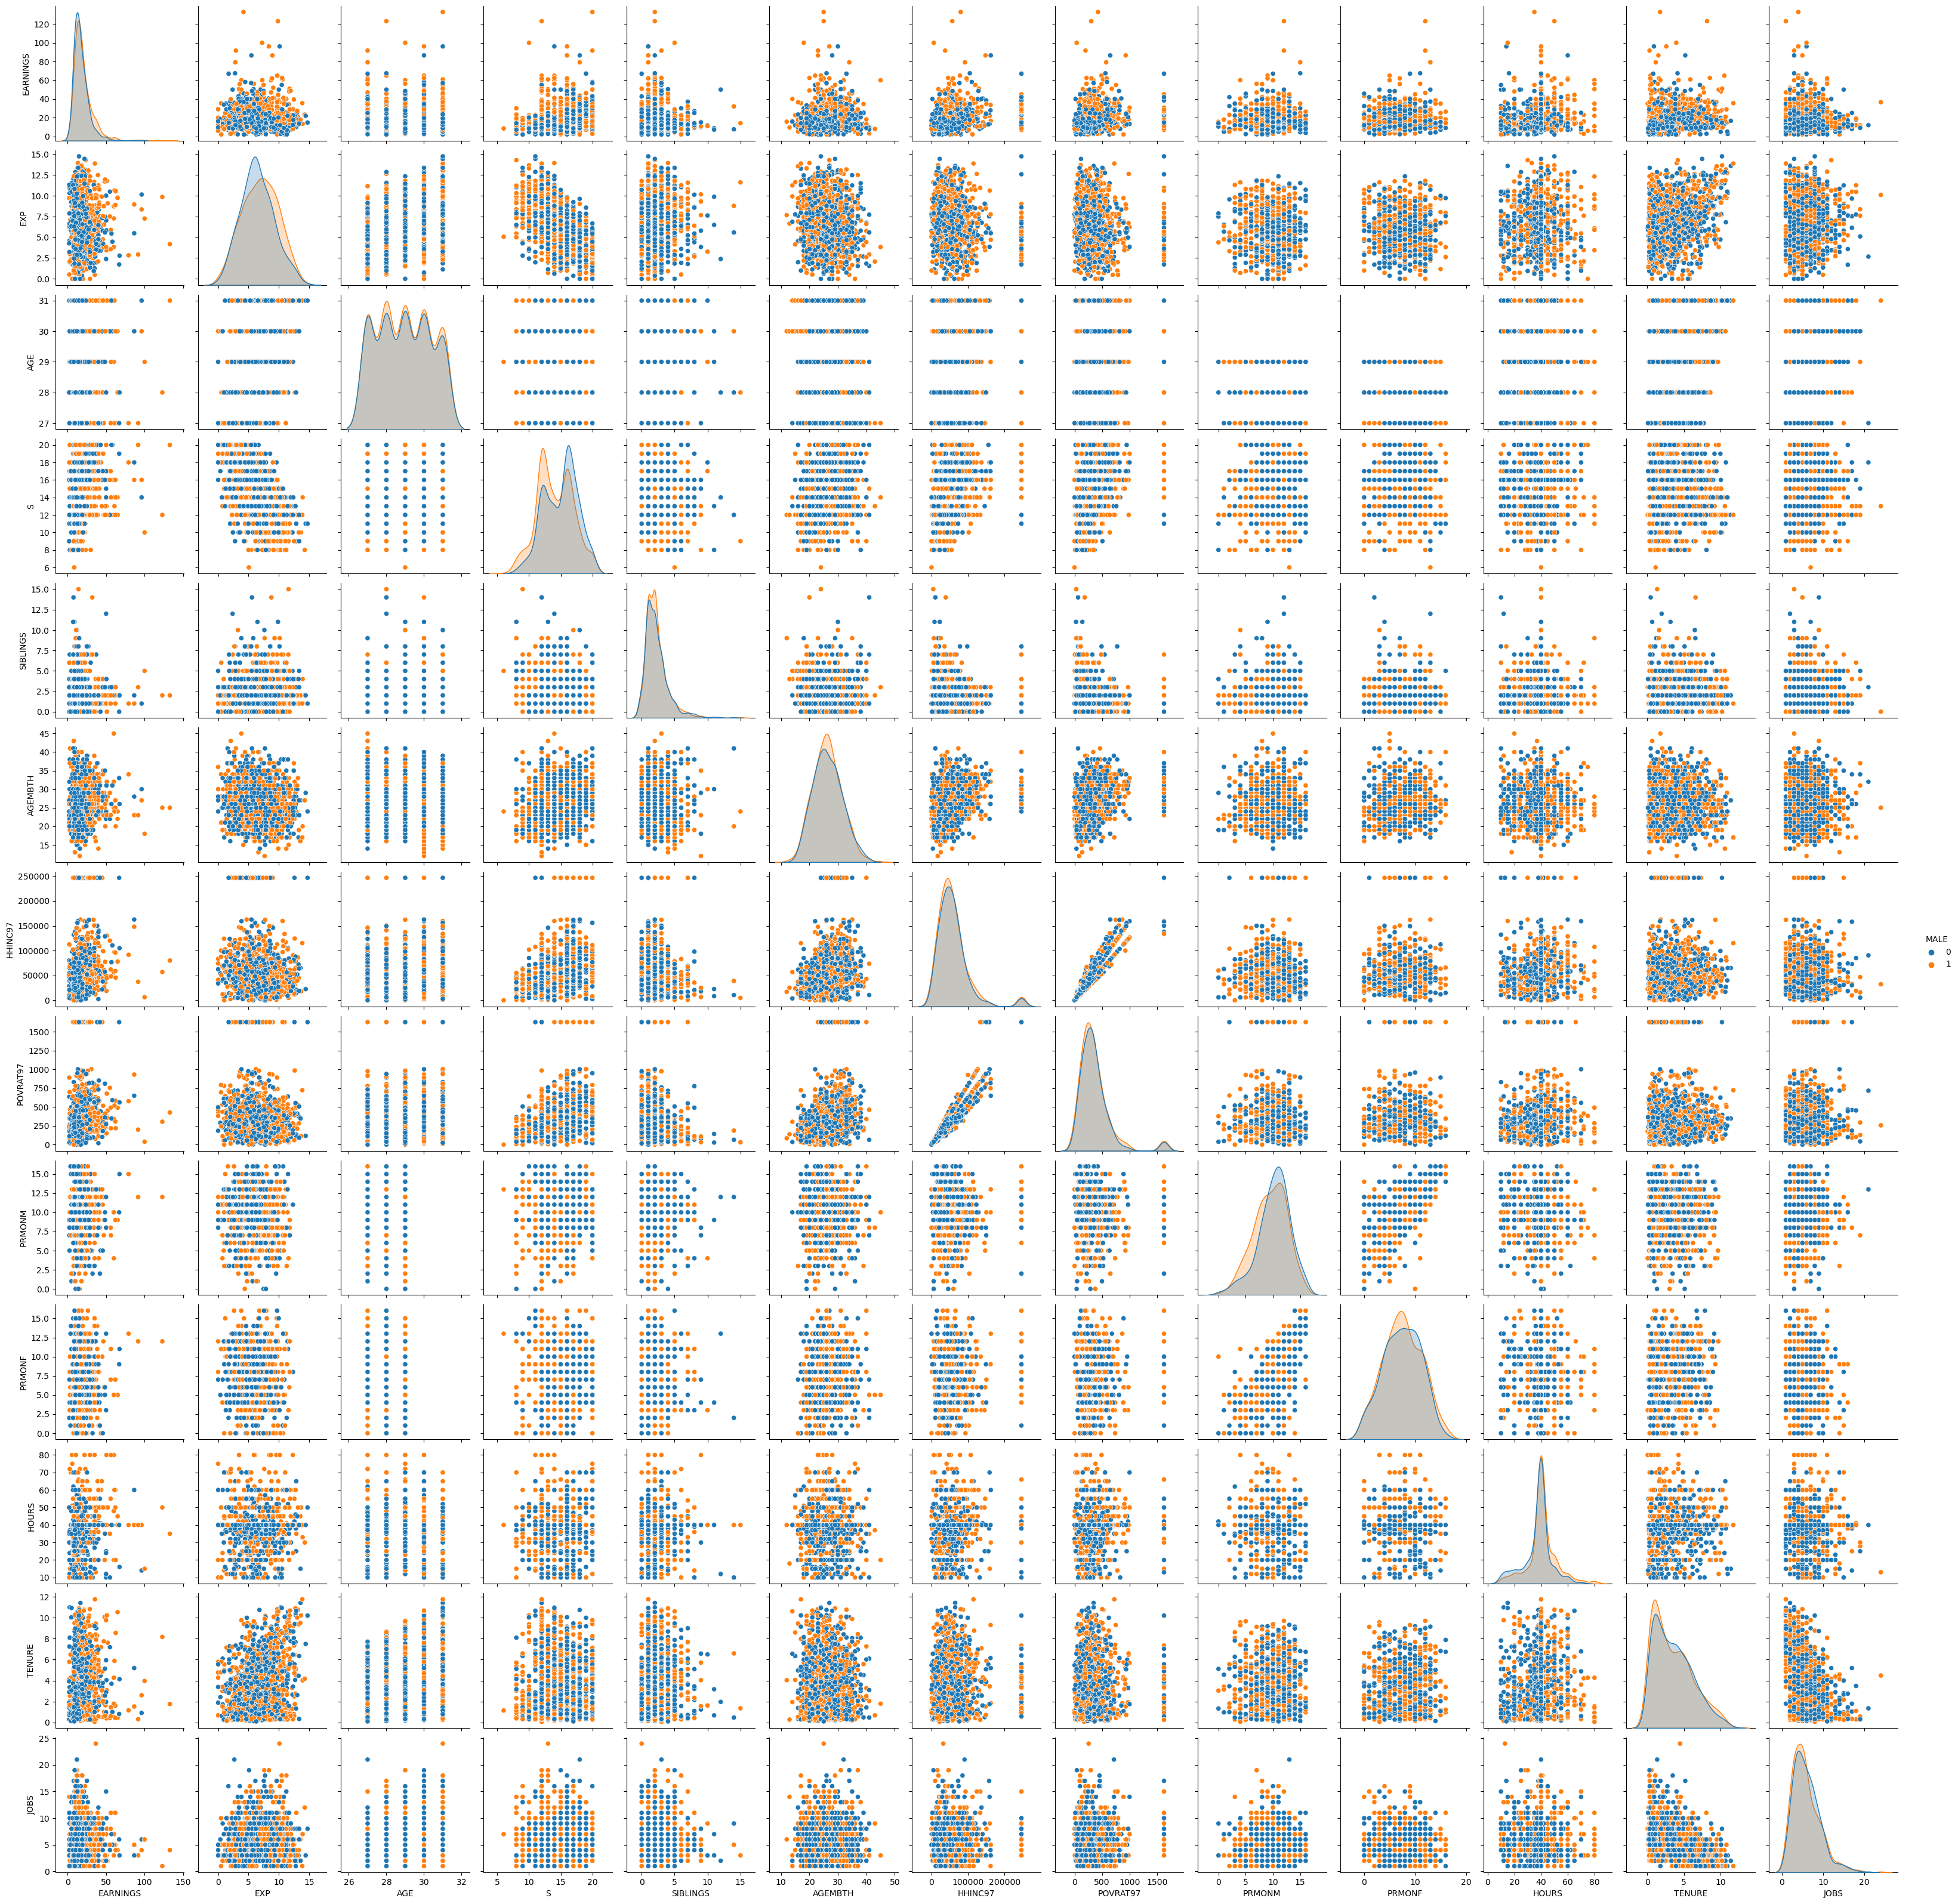

In [36]:
sns.pairplot(reduced_df, hue='MALE')
plt.show()

<AxesSubplot:>

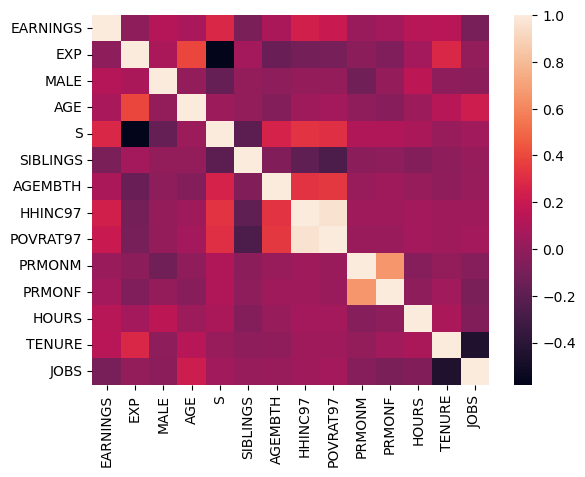

In [46]:
sns.heatmap(reduced_df.corr())

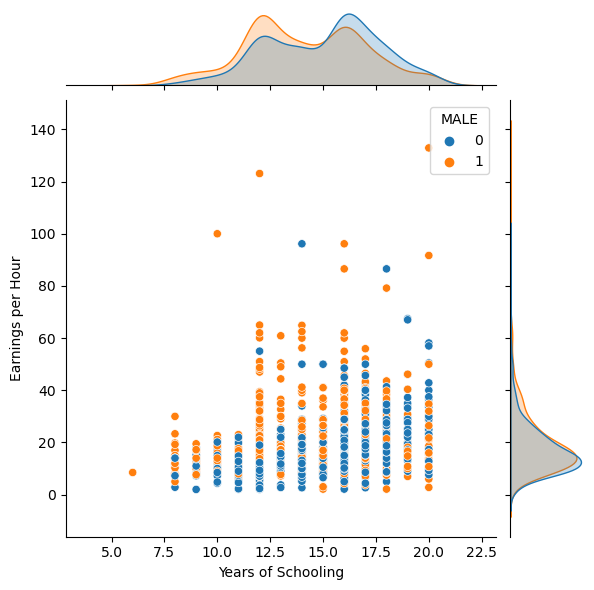

In [45]:
plot = sns.jointplot(x=reduced_df['S'], y =reduced_df['EARNINGS'], hue=reduced_df['MALE'])
plot.set_axis_labels('Years of Schooling', 'Earnings per Hour')

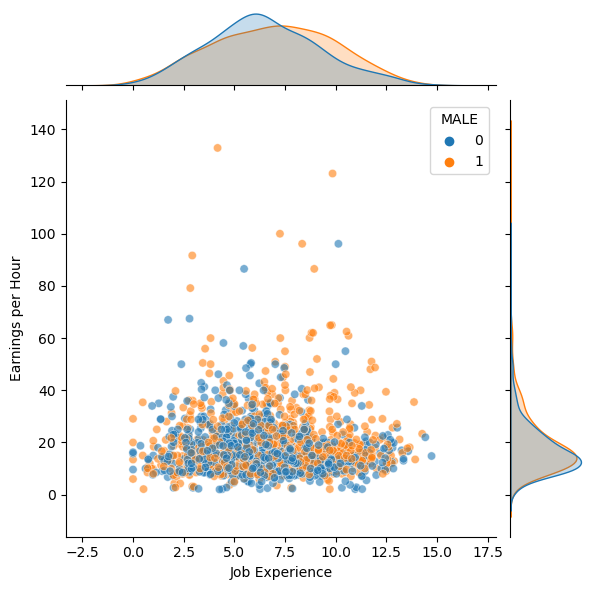

In [40]:
plot = sns.jointplot(x=reduced_df['EXP'], y =reduced_df['EARNINGS'], hue=reduced_df['MALE'], alpha=0.6)
plot.set_axis_labels('Job Experience', 'Earnings per Hour')

Text(0.5, 1.0, 'Hourly Earnings distribtion')

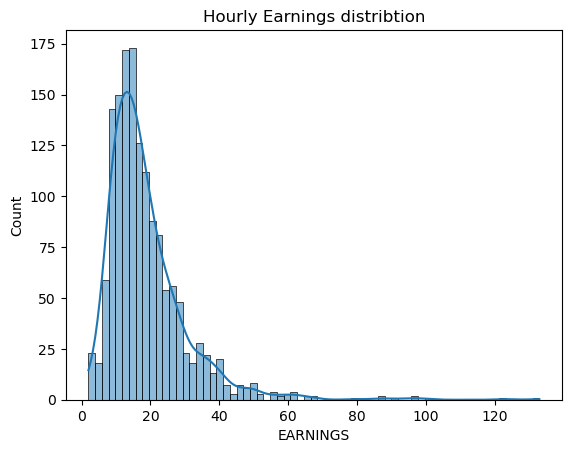

In [44]:
sns.histplot(reduced_df['EARNINGS'], kde=True)
plt.title('Hourly Earnings distribtion')

### PCA 

In [61]:
#Principal components visualisation for all features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

redf = df_data.drop(['EARNINGS','ID'], axis=1)
scaler = StandardScaler()
scaler.fit(redf)
scaled = scaler.transform(redf)

pca = PCA(n_components=2)
pca.fit(scaled)

pca_df = pca.transform(scaled)


C:\Users\kaczo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second principal component')

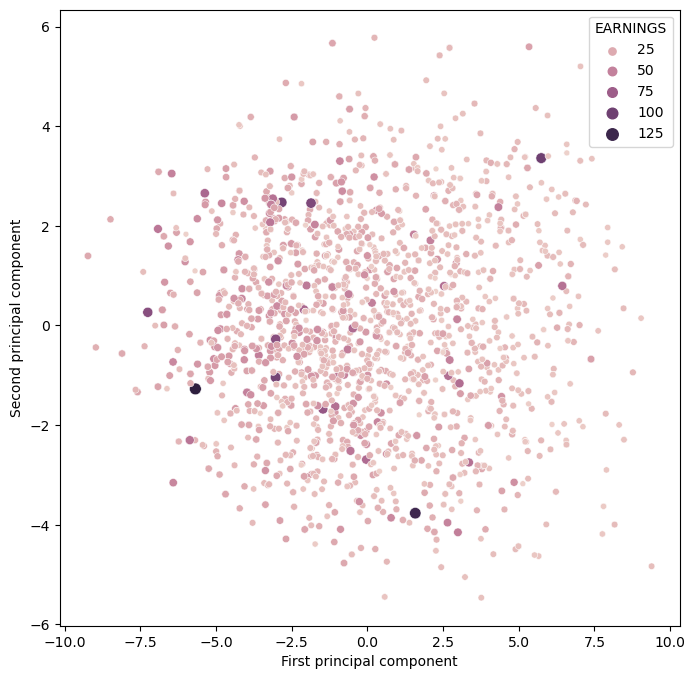

In [62]:
plt.figure(figsize=(8, 8))
sns.scatterplot(pca_df[:, 0], pca_df[:, 1], hue=df_data['EARNINGS'], size=df_data['EARNINGS'])

# plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


Text(220.72222222222223, 0.5, 'Principal components')

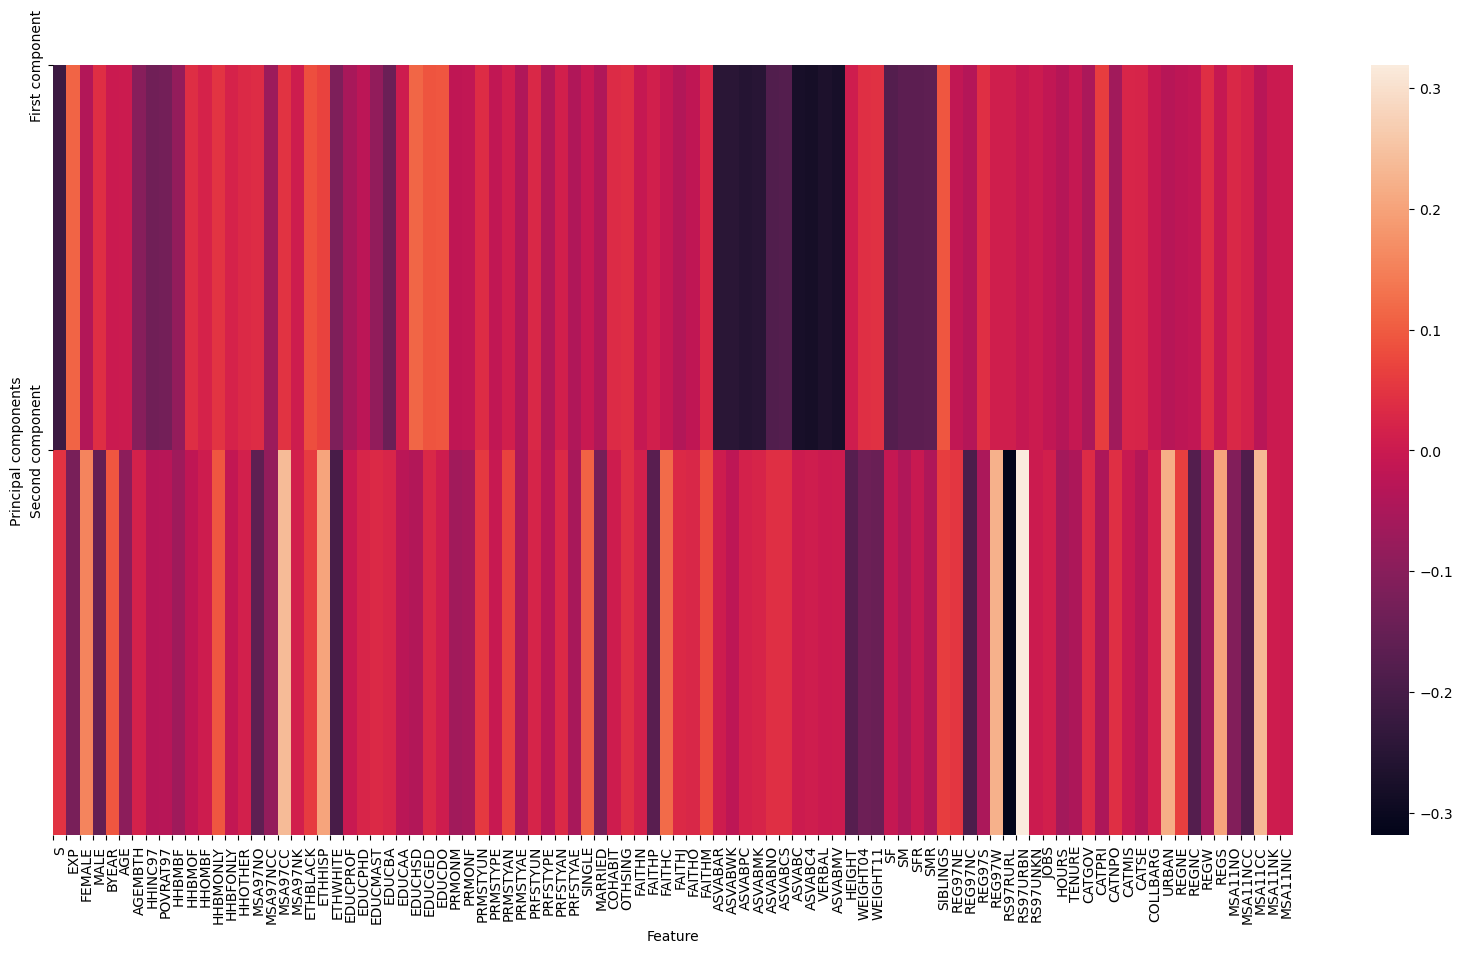

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(pca.components_)
plt.yticks([0, 1], ["First component", "Second component"])
plt.xticks(range(len(redf.columns)),
 redf.columns, rotation=90, ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal components")

In [52]:
#Principal components visualisation for reduced features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

redf = reduced_df.drop('EARNINGS', axis=1)
scaler = StandardScaler()
scaler.fit(redf)
scaled = scaler.transform(redf)

pca = PCA(n_components=2)
pca.fit(scaled)

pca_df = pca.transform(scaled)


C:\Users\kaczo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second principal component')

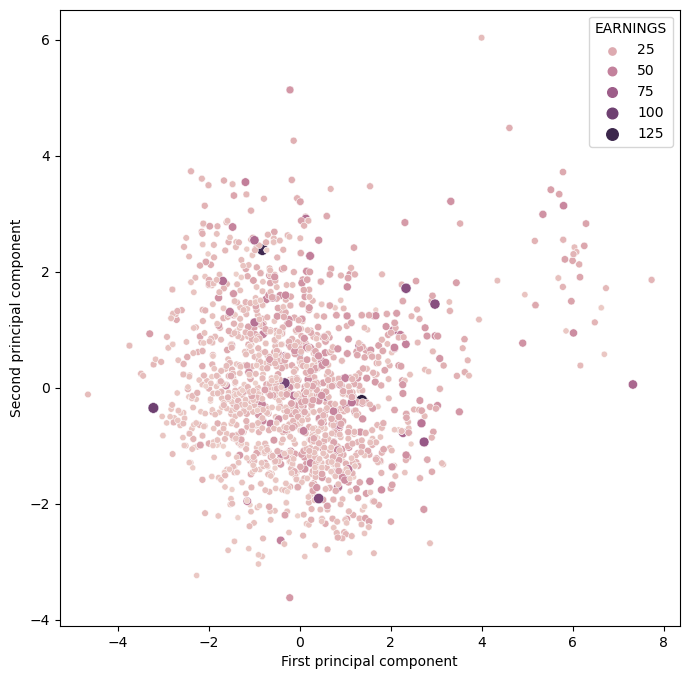

In [53]:
plt.figure(figsize=(8, 8))
sns.scatterplot(pca_df[:, 0], pca_df[:, 1], hue=reduced_df['EARNINGS'], size=reduced_df['EARNINGS'])

# plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


Text(50.722222222222214, 0.5, 'Principal components')

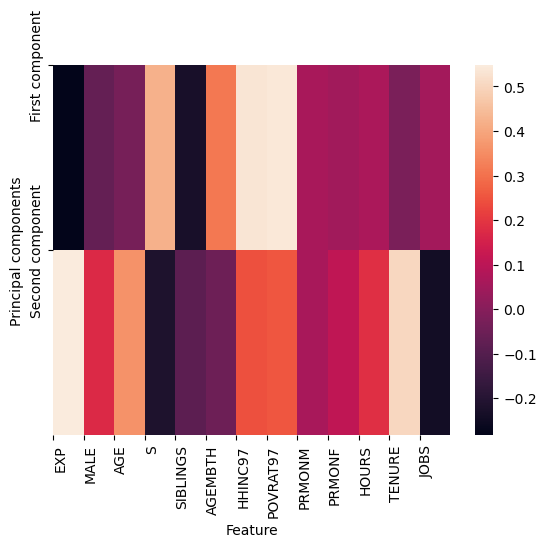

In [54]:
sns.heatmap(pca.components_)
plt.yticks([0, 1], ["First component", "Second component"])
plt.xticks(range(len(redf.columns)),
 redf.columns, rotation=90, ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal components")

## Simple Linear Regression



In [54]:
#earnings vs schooling years
X = df_data['S']
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train= X_train.values.reshape(-1, 1)
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
print(regression.intercept_)
print(regression.coef_)

0.9556780582686706
[1.22750131]


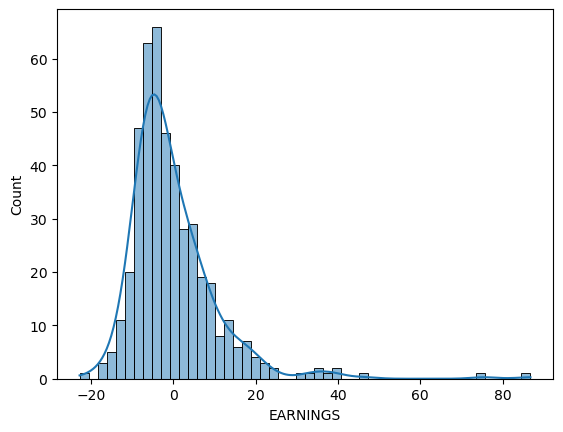

In [59]:
predictions = regression.predict(X_test)
residual = y_test-predictions
sns.histplot(residual,bins=50, kde=True);

In [80]:
regression.score(X_test, y_test)

0.19459681384012006

## Multivariable Regression



In [176]:
#Earnings vs job experience and schooling years
X = df_data[['EXP','S']]
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.score(X_train, y_train))
print(regression.score(X_test, y_test))

0.11121293276512101
0.11047287951632523


In [24]:
#Based on all features
X = df_data.drop(['EARNINGS','ID'],axis=1)
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.score(X_train, y_train))
print(regression.score(X_test, y_test))

0.28536938465004513
0.2595959680109563


### Data transformation
Transforming data to check for better model fitting

#### Scaling data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

regression.fit(X_train_scaled, y_train)
print(regression.score(X_train_scaled, y_train))
print(regression.score(X_test_scaled, y_test))

0.28536936499704035
0.25960003693841693


#### Lasso regulatization

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=1000).fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.25
Test set score: 0.23
Number of features used: 46


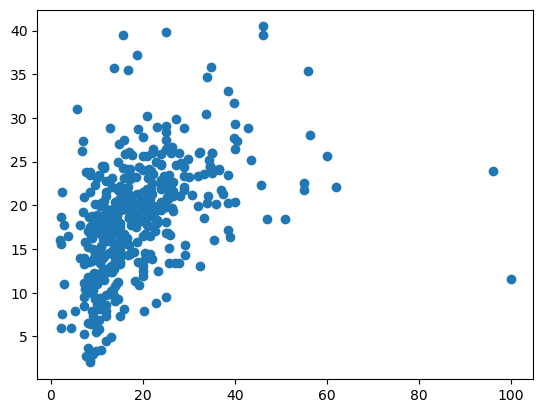

In [183]:
predictions = regression.predict(X_test)
plt.scatter(y_test,predictions)


## Linear Regression Model for all features

In [196]:

X = df_data.drop(['EARNINGS','ID'],axis=1)
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

logmodel = LinearRegression()
logmodel.fit(X_train, y_train)
logmodel.score(X_train, y_train)

0.3053115123668235

In [185]:
mae = mean_absolute_error(y_test, logmodel.predict(X_test))
print('MAE: %.3f' % mae)

MAE: 6.571


In [186]:
importance = logmodel.coef_
coef = pd.DataFrame(importance, index=X_train.columns, columns=['Coefficient'])
coef.sort_values('Coefficient')


Coefficient
AGE      -5,302,829,466.19
BYEAR    -5,302,829,466.12
FEMALE   -4,426,613,583.36
MALE     -4,426,613,581.68
ASVABC4      -4,964,907.61
...                    ...
HHBMONLY    107,223,821.80
HHBMOF      107,223,822.06
HHBMBF      107,223,822.07
HHOMBF      107,223,822.14
HHBFONLY    107,223,822.52

[94 rows x 1 columns]

### Selecting most relevant features using ANOVA

In [6]:
fs = SelectKBest(score_func=f_regression, k=15)
fit = fs.fit(X_train, y_train)


C:\Users\kaczo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [7]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features, features_score], axis=1)
feature_score.columns = ['Input_feature', 'F-score']
feature_score.nlargest(15,'F-score')

Input_feature  F-score
1              S    94.50
54       ASVABMK    91.95
51       ASVABAR    91.70
58       ASVABC4    76.62
57        ASVABC    73.52
60       ASVABMV    73.13
8        HHINC97    54.20
0             ID    44.29
66           SFR    42.91
83         CATSE    40.55
9       POVRAT97    40.51
55       ASVABNO    40.33
59        VERBAL    39.79
78        TENURE    39.25
17      MSA97NCC    38.55

#### Model for selected features

In [192]:
#for selected features
X = df_data[['S','ASVABMK','ASVABAR','ASVABC4','ASVABMV','ASVABC','EDUCPROF',
            'HHINC97','VERBAL','ASVABPC','SFR','CATSE','SF','POVRAT97','ASVABWK']]
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

logmodel = LinearRegression()
logmodel.fit(X_train, y_train)
print(logmodel.score(X_train, y_train))
print(logmodel.score(X_test, y_test))

0.1993385857511022
0.0987073882904479


### Random Forrest


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
X = df_data.drop(['EARNINGS','ID'],axis=1)
y = df_data['EARNINGS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [167]:
mod = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [168]:
mod.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [169]:
mod.score(X_train,y_train)

0.8804653175694708

In [170]:
mod.score(X_test,y_test)

0.11004892323919957

In [195]:
mod.feature_importances_

array([0.0723617 , 0.13470932, 0.10774639, 0.04329973, 0.07390033,
       0.0506246 , 0.0382075 , 0.09135598, 0.04760813, 0.06181311,
       0.04122633, 0.05385425, 0.02963688, 0.06525836, 0.0883974 ])

### Parameters seach using Gridearch

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {"n_estimators":np.arange(10,200,10),"max_features":[0.25,0.5,0.75,"auto","sqrt",'log'],"min_samples_split":np.arange(2,10,2),"min_samples_leaf":np.arange(2,10,2),"max_depth":[None,2,4]}
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
gs_model = GridSearchCV(rf,grid,cv=5,verbose=True)
gs_model.fit(X_train,y_train) 

Fitting 5 folds for each of 5472 candidates, totalling 27360 fits


In [ ]:
print(gs_model.score(X_train, y_train))
print(gs_model.score(X_test, y_test))

In [209]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 190}

In [10]:
rf = RandomForestRegressor(n_estimators=190, min_samples_split=2, min_samples_leaf=2, max_features=0.5)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8604514693504989
0.40274935663653677


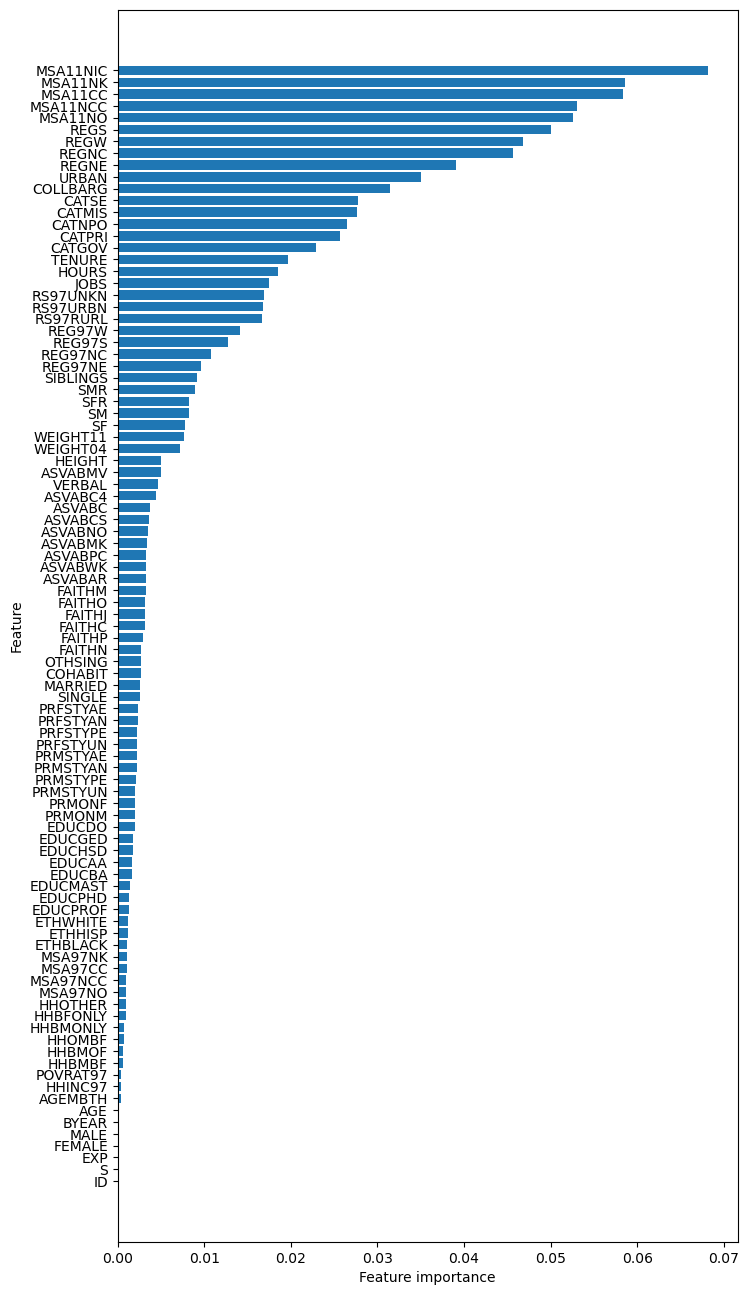

In [19]:
def plot_feature_importances(model):
 plt.figure(figsize=(8,16))
 n_features = X_train.shape[1]
 plt.barh(range(n_features), np.sort(model.feature_importances_), align='center')
 plt.yticks(np.arange(n_features), X_train.columns)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances(rf)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = rf.predict(X_test)

mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test,pred))

print(f'MAE: {mae}')
print(f'MEE: {mse}')
print(f'RMSE: {rmse}')

MAE: 5.447313799921375
MEE: 96.3719109280714
RMSE: 9.81691962522213
